# **Classification**

## Import all the crucial libraries

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

## Import the dataset

In [2]:
data=pd.read_csv('hmelq.csv')
df = data.copy()
# df = df.dropna()
df.tail(50)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3526,1,13300,60014.0,75695.0,DebtCon,Sales,1.0,0.0,NaN,182.06,1.0,20.0,40.207
3527,1,23300,103783.0,132612.0,DebtCon,Sales,1.0,0.0,NaN,120.35,0.0,19.0,203.312
3528,1,10000,84000.0,132965.0,DebtCon,Sales,30.0,0.0,0.0,325.63,1.0,24.0,NaN
3529,1,16800,44983.0,65000.0,DebtCon,Sales,4.0,2.0,1.0,77.03,6.0,43.0,NaN
3530,1,25000,59000.0,34000.0,DebtCon,Sales,10.0,4.0,2.0,125.83,7.0,23.0,NaN
3531,1,12800,111000.0,124500.0,DebtCon,Sales,7.0,1.0,0.0,203.90,2.0,40.0,NaN
3532,1,40000,76769.0,129000.0,DebtCon,Sales,30.0,0.0,0.0,286.30,2.0,35.0,NaN
3533,1,6900,37055.0,83000.0,HomeImp,Sales,1.0,0.0,0.0,122.27,2.0,43.0,NaN
3534,1,13500,70000.0,93500.0,DebtCon,Sales,25.0,0.0,0.0,250.63,0.0,46.0,NaN
3535,1,5400,45509.0,57453.0,DebtCon,Sales,4.0,0.0,0.0,95.60,0.0,22.0,NaN


In [3]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [11]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [6]:
df.shape

(3576, 13)

In [12]:
df.notnull()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,True,True,True,True,True,False,True,True,True,True,True,True,True
1,True,True,True,True,True,False,True,True,True,True,True,True,True
2,True,True,True,True,True,False,True,True,True,True,True,True,True
3,True,True,True,True,True,False,True,True,True,True,True,True,True
4,True,True,True,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,True,True,True,True,True,True,False,True,True,True,True,True,False
3572,True,True,True,False,True,True,False,True,True,True,True,True,True
3573,True,True,True,False,True,True,True,True,True,True,True,True,False
3574,True,True,False,True,True,True,True,True,True,True,True,True,False


In [13]:
data[data.notnull()]

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


## Exploration of Variables

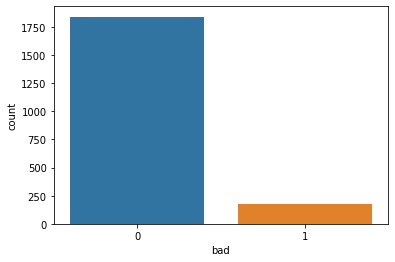

In [5]:
sns.countplot(df.bad);

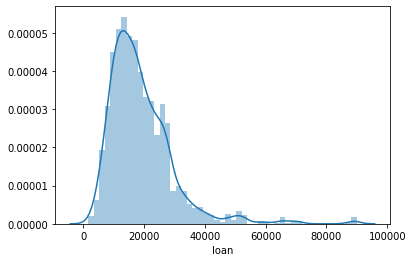

In [6]:
sns.distplot(df.loan);

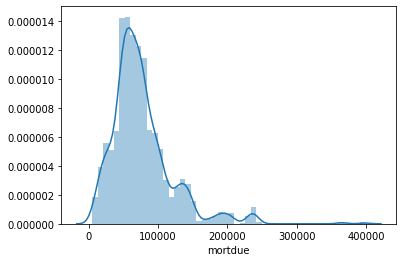

In [7]:
sns.distplot(df.mortdue);

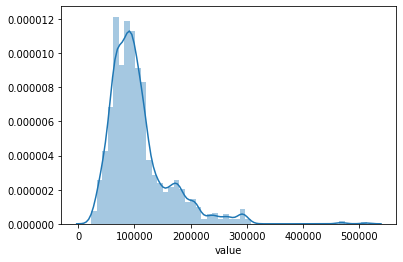

In [8]:
sns.distplot(df.value);

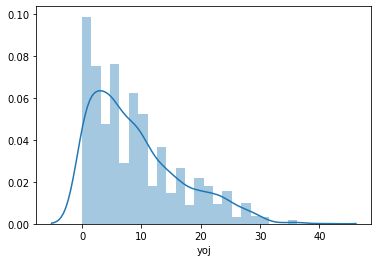

In [9]:
sns.distplot(df.yoj);

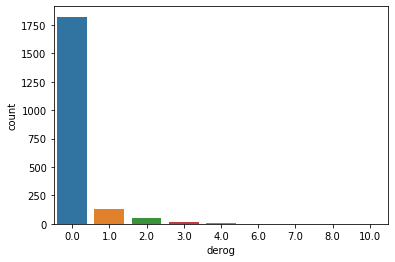

In [10]:
sns.countplot(df.derog);

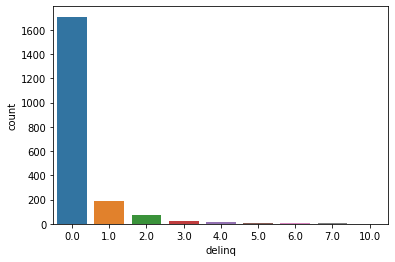

In [11]:
sns.countplot(df.delinq);

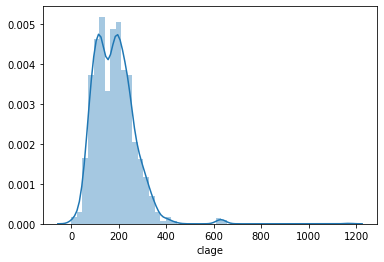

In [12]:
sns.distplot(df.clage);

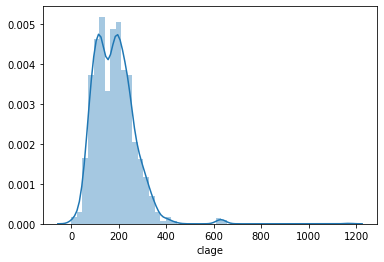

In [13]:
sns.distplot(df.clage);

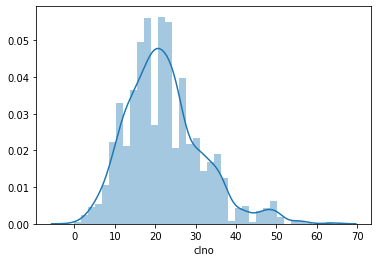

In [14]:
sns.distplot(df.clno);

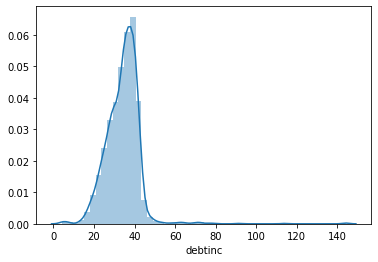

In [15]:
sns.distplot(df.debtinc);

In [ ]:
dff = data.copy()

## Encoding the categorical data

In [16]:
dms=pd.get_dummies(df[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


# Logistic Regression

In [17]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)


X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()


Optimization terminated successfully.
         Current function value: 0.238483
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Sat, 03 Oct 2020   Pseudo R-squ.:                  0.2007
Time:                        22:26:14   Log-Likelihood:                -481.26
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 6.349e-43
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.625e-05   1.07e-05     -2.453      0.014   -4.72e-05   -5.27e-06
mortdue        -4.837e-06   4.98e-06     -0.972      0.331   -1.46e-05    4.91e-06
value           1.216e-07   4.35e-06      0.028      0.978   -8.41e-06    8.66e-06
yoj               -0.0145      0.013     -1.114      0.265      -0.040       0.011
derog              0.5742      0.131      4.388      0.000       0.318       0.831
delinq             0.7806      0.091      8.595      0.000       0.603       0.959
clage             -0.0066      0.001     -4.898      0.000      -0.009      -0.004
ninq               0.0919      0.048      1.916      0.055      -0.002       0.186
clno              -0.0369      0.011     -3.488      0.000      -0.058      -0.016
debtinc            0.0704      0.010      6.833      0.000       0.050       0.091
job_Mgr           -2.4682      0.364     -6.774      0.000      -3.182      -1.754
job_Office        -3.0527      0.381     -8.013      0.000      -3.799      -2.306
job_Other         -2.6848      0.317     -8.457      0.000      -3.307      -2.063
job_ProfEx        -2.5181      0.336     -7.494      0.000      -3.177      -1.860
job_Sales         -1.3558      0.620     -2.187      0.029      -2.571      -0.141
reason_DebtCon    -0.0854      0.193     -0.443      0.658      -0.463       0.292
==================================================================================
"""

In [19]:
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)

In [20]:
#scikit-learn ile Logistic Regression

In [21]:
?LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(C=0.1,solver = "newton-cg") 
loj_model = loj.fit(X_train,y_train)
loj_model


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred_train = loj_model.predict(X_train)


In [10]:
accuracy_score(y_train, y_pred_train)

0.9244114002478315

In [11]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1471
           1       0.84      0.18      0.30       143

    accuracy                           0.92      1614
   macro avg       0.88      0.59      0.63      1614
weighted avg       0.92      0.92      0.90      1614



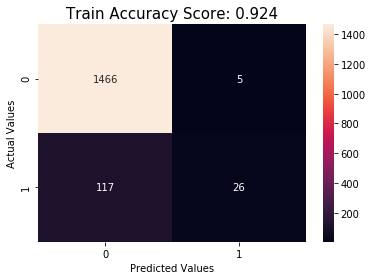

In [12]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_train)
score = round(accuracy_score(y_train, predictions), 3)
cm1 = cm(y_train, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Train Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [13]:
loj_model.intercept_


array([-3.35188221])

In [14]:
loj_model.coef_


array([[-2.01081390e-05, -6.75022444e-07,  2.19855561e-06,
        -1.75695960e-02,  4.00179049e-01,  6.85443755e-01,
        -5.08216267e-03,  9.31312306e-02, -2.49099266e-02,
         7.15079691e-02, -1.26528497e-01, -3.91909352e-01,
        -2.55456988e-01, -2.10592789e-01,  4.44909758e-02,
        -6.18251118e-02]])

## Lojistik Regresyon  & Model Tuning

In [15]:
loj_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = loj_model.predict(X_test)


In [17]:
confusion_matrix(y_test, y_pred)


array([[368,   1],
       [ 30,   5]])

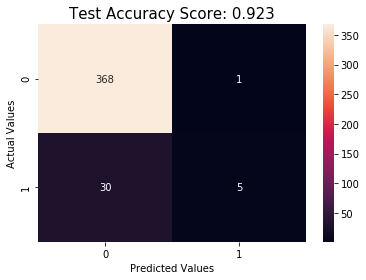

In [18]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Test Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [19]:
accuracy_score(y_test, y_pred)



0.9232673267326733

In [20]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.83      0.14      0.24        35

    accuracy                           0.92       404
   macro avg       0.88      0.57      0.60       404
weighted avg       0.92      0.92      0.90       404



In [21]:
loj_model.predict_proba(X_test)[0:10][:,0:2]


array([[0.9368772 , 0.0631228 ],
       [0.90337934, 0.09662066],
       [0.96846372, 0.03153628],
       [0.97674545, 0.02325455],
       [0.9058224 , 0.0941776 ],
       [0.95139755, 0.04860245],
       [0.89210843, 0.10789157],
       [0.91923899, 0.08076101],
       [0.98292371, 0.01707629],
       [0.96129049, 0.03870951]])

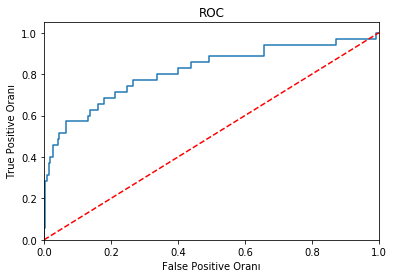

In [22]:
# ROC 
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))# burdaki score öenmli

fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [23]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
logit_roc_auc 


0.5700735578784358

In [24]:
cross_val_score(loj_model, X_test, y_test, cv = 10)


array([0.92682927, 0.95121951, 1.        , 0.90243902, 0.9       ,
       0.925     , 0.95      , 0.95      , 0.925     , 0.9       ])

In [25]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.933048780487805

# Gaussian Naive Bayes

In [178]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [179]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [180]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
gnb_model


GaussianNB(priors=None, var_smoothing=1e-09)

In [181]:
gnb_model.predict(X_test)[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
gnb_model.predict_proba(X_test)[0:10]


array([[0.98931811, 0.01068189],
       [0.99513943, 0.00486057],
       [0.99746934, 0.00253066],
       [0.99625835, 0.00374165],
       [0.99632327, 0.00367673],
       [0.98945055, 0.01054945],
       [0.99375044, 0.00624956],
       [0.99639335, 0.00360665],
       [0.99571864, 0.00428136],
       [0.99831886, 0.00168114]])

In [183]:
y_pred = gnb_model.predict(X_test)


In [184]:
accuracy_score(y_test, y_pred)


0.9158415841584159

In [185]:
cross_val_score(gnb_model, X_test, y_test, cv = 10).mean()


0.9158536585365853

# Bernoulli Naive Bayes

In [105]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [106]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
bnb_model


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [107]:
y_pred = bnb_model.predict(X_test)


In [108]:
accuracy_score(y_test, y_pred)


0.905940594059406

In [109]:
cross_val_score(bnb_model, X_test, y_test, cv = 10).mean()

0.9061585365853659

# Multinomial Naive Bayes

In [111]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [112]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
y_pred = mnb_model.predict(X_test)


In [114]:
accuracy_score(y_test, y_pred)


0.7128712871287128

In [115]:
cross_val_score(mnb_model, X_test, y_test, cv = 10).mean()


0.747560975609756

# KNN 

In [117]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [118]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [119]:
y_pred = knn_model.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred)

0.905940594059406

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       369
           1       0.20      0.03      0.05        35

    accuracy                           0.91       404
   macro avg       0.56      0.51      0.50       404
weighted avg       0.85      0.91      0.87       404



## KNN - Model Tuning

In [122]:
knn_model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [123]:
knn_params = {"n_neighbors": np.arange(1,50)}


In [124]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))


En iyi skor:0.911406333870102
En iyi parametreler: {'n_neighbors': 12}


In [126]:
knn = KNeighborsClassifier(12)
knn_tuned = knn.fit(X_train, y_train)


In [127]:
knn_tuned.score(X_test, y_test)


0.9133663366336634

In [128]:
y_pred = knn_tuned.predict(X_test)

In [129]:
accuracy_score(y_test, y_pred)


0.9133663366336634

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



# SVC

In [10]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [11]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)


In [134]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [135]:
y_pred = svm_model.predict(X_test)

In [136]:
accuracy_score(y_test, y_pred)


0.9257425742574258

## SVC-Model Tuning

In [49]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
?svm_model

In [53]:
svc_params = {"C": np.arange(1,10), "kernel" :["linear"]}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 113.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [54]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 2, 'kernel': 'linear'}


In [137]:
svc_tuned = SVC(kernel = "linear",C = 2).fit(X_train, y_train)

In [138]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9257425742574258

# Neural Network

   

In [241]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [243]:
from sklearn.preprocessing import StandardScaler  

In [244]:
scaler = StandardScaler()

In [245]:
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [246]:
from sklearn.neural_network import MLPClassifier

In [247]:
mlpc = MLPClassifier().fit(X_train, y_train)


In [248]:
y_pred = mlpc.predict(X_test)
accuracy_score(y_test, y_pred)

0.948019801980198

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       1.00      0.40      0.57        35

    accuracy                           0.95       404
   macro avg       0.97      0.70      0.77       404
weighted avg       0.95      0.95      0.94       404



##  Neural Network- Model Tuning

In [65]:
mlpc


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [90]:
?mlpc

In [91]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [93]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 23.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [94]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [250]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.005, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")


In [251]:
mlpc_tuned.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [252]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.948019801980198

In [253]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       369
           1       0.82      0.51      0.63        35

    accuracy                           0.95       404
   macro avg       0.89      0.75      0.80       404
weighted avg       0.94      0.95      0.94       404



# CART 

   

## CART - Model & Tahmin

In [255]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [258]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [259]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))



((((1 if x[4] <= 2.5 else (1 if x[7] <= 0.5 else 0) if x[0] <= 3250.0 else 
    ((1 if x[5] <= 20.739999771118164 else (((1 if x[4] <= 4.5 else (((0 if
    x[4] <= 7.5 else 1 if x[4] <= 8.5 else ((0 if x[10] <= 0.5 else 1) if x
    [3] <= 125.86000061035156 else 1 if x[7] <= 0.5 else 0) if x[0] <= 
    8700.0 else ((1 if x[8] <= 0.5 else 0) if x[4] <= 11.5 else 1) if x[3] <=
    107.08000183105469 else 0) if x[4] <= 21.5 else (0 if x[3] <= 
    93.68000030517578 else 1) if x[3] <= 97.7249984741211 else 0) if x[4] <=
    35.0 else 1) if x[3] <= 172.19000244140625 else 1) if x[5] <= 
    38.168500900268555 else 1) if x[5] <= 38.482500076293945 else 1 if x[0] <=
    4100.0 else 0) if x[2] <= 1.5 else (0 if x[3] <= 141.64500427246094 else
    0 if x[8] <= 0.5 else 1) if x[5] <= 36.14699935913086 else 1) if x[3] <=
    172.70000457763672 else ((0 if x[0] <= 6100.0 else 1) if x[4] <= 8.5 else
    0) if x[3] <= 352.44000244140625 else 1) if x[0] <= 9550.0 else ((((1 if
    x[3] <= 16.50999975

In [260]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9381188118811881

In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       369
           1       0.65      0.63      0.64        35

    accuracy                           0.94       404
   macro avg       0.81      0.80      0.80       404
weighted avg       0.94      0.94      0.94       404



## CART - Model Tuning

In [262]:
cart_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
?cart_model


In [109]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [110]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1772 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   18.0s finished


In [111]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))


En iyi parametreler: {'max_depth': 4, 'min_samples_split': 2}


In [263]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)


In [264]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [265]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.92      0.34      0.50        35

    accuracy                           0.94       404
   macro avg       0.93      0.67      0.73       404
weighted avg       0.94      0.94      0.93       404



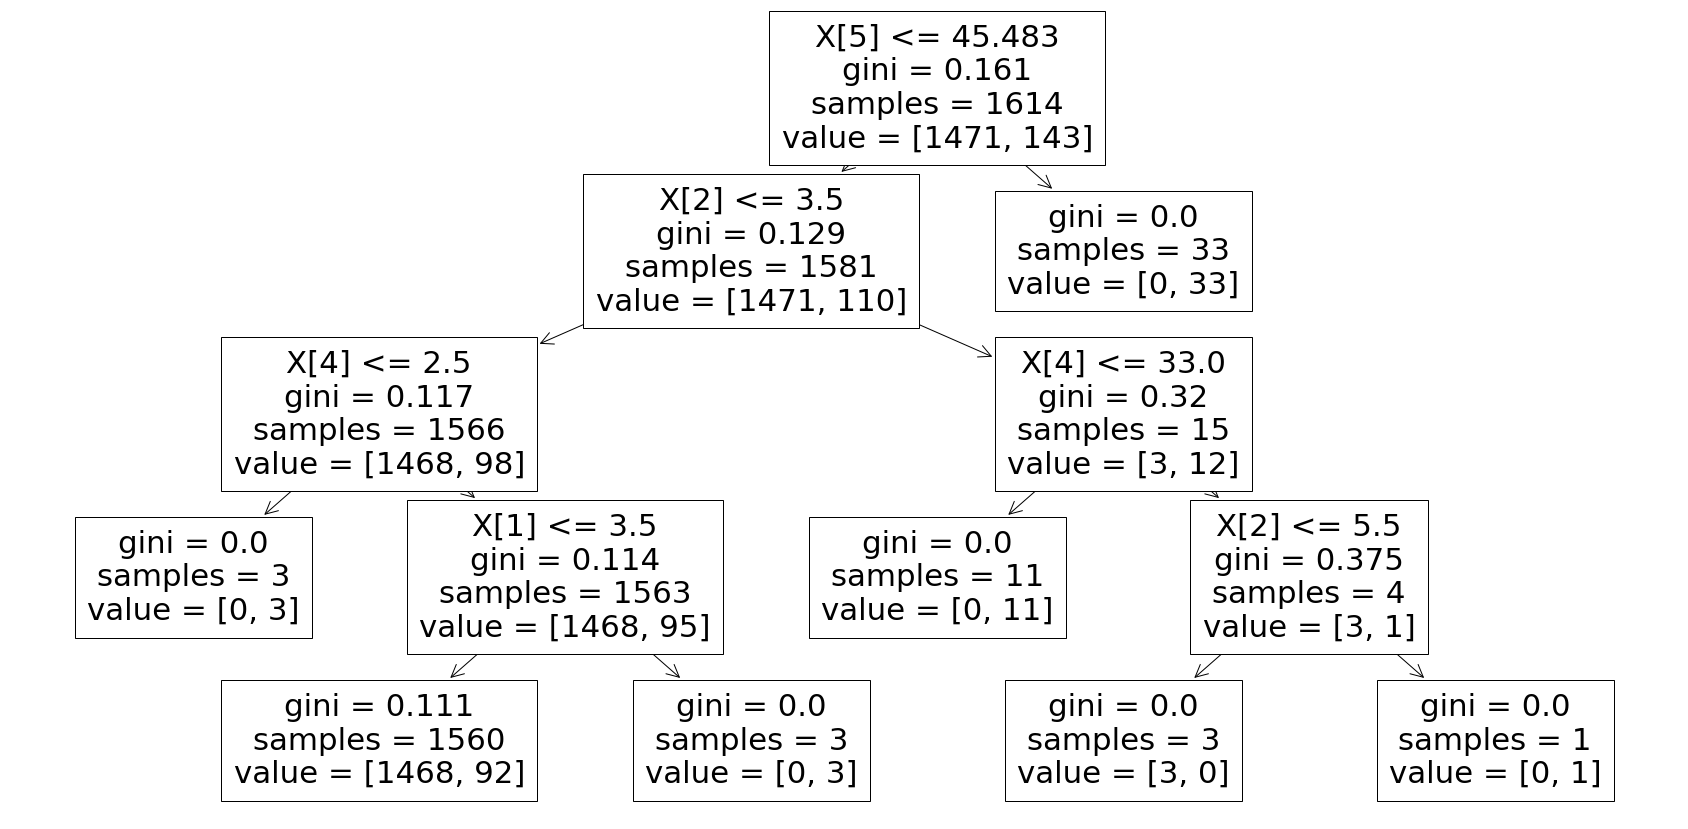

In [266]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# Random Forests

In [189]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [190]:
from sklearn.ensemble import RandomForestClassifier


In [191]:
rf_model = RandomForestClassifier().fit(X_train, y_train)


In [192]:
rf_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.943069306930693

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.93      0.37      0.53        35

    accuracy                           0.94       404
   macro avg       0.94      0.68      0.75       404
weighted avg       0.94      0.94      0.93       404



## Random Forests -Model Tuning

In [131]:
rf_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
?rf_model


In [123]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000], 
            "min_samples_split": [2,5,10]} 


In [124]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [125]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 11.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [126]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))
 

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 1000}


In [195]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9381188118811881

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       1.00      0.29      0.44        35

    accuracy                           0.94       404
   macro avg       0.97      0.64      0.71       404
weighted avg       0.94      0.94      0.92       404



In [198]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

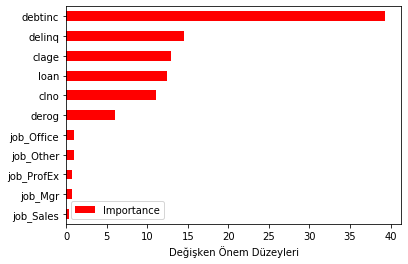

In [199]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines(GBM)

In [200]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [201]:
from sklearn.ensemble import GradientBoostingClassifier


In [202]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)


In [203]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.943069306930693

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.88      0.40      0.55        35

    accuracy                           0.94       404
   macro avg       0.91      0.70      0.76       404
weighted avg       0.94      0.94      0.93       404



## GBM - Model Tuning

In [100]:
gbm_model


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [138]:
?gbm_model

In [139]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100], # ağaç sayısı
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}


In [140]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)


In [141]:
gbm_cv.fit(X_train, y_train)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [142]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [205]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 500)


In [206]:
gbm_tuned =  gbm.fit(X_train,y_train)


In [207]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.948019801980198

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.84      0.46      0.59        35

    accuracy                           0.95       404
   macro avg       0.90      0.72      0.78       404
weighted avg       0.94      0.95      0.94       404



Text(0.5, 0, 'Değişken Önem Düzeyleri')

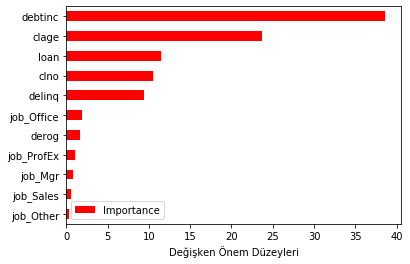

In [208]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost (eXtreme Gradient Boosting)


In [209]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [210]:
from xgboost import XGBClassifier

In [211]:
xgb_model = XGBClassifier().fit(X_train, y_train)


In [212]:
xgb_model


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [213]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [214]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.82      0.40      0.54        35

    accuracy                           0.94       404
   macro avg       0.88      0.70      0.75       404
weighted avg       0.94      0.94      0.93       404



## XGBoost -Model Tuning

In [152]:
xgb_model


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
?xgb_model

In [154]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}


In [155]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)


In [156]:
xgb_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 55.2min finished


[22:57:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [157]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [215]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 0.6)


In [216]:
xgb_tuned =  xgb.fit(X_train,y_train)


[14:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [217]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9331683168316832

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       369
           1       0.79      0.31      0.45        35

    accuracy                           0.93       404
   macro avg       0.86      0.65      0.71       404
weighted avg       0.93      0.93      0.92       404



Text(0.5, 0, 'Değişken Önem Düzeyleri')

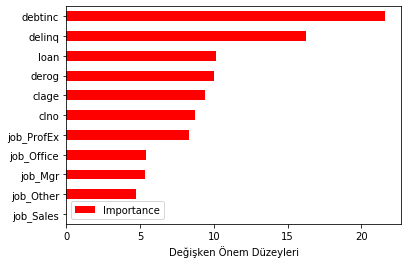

In [219]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# LightGBM    

In [220]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [221]:
from lightgbm import LGBMClassifier


In [222]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)


In [223]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       369
           1       0.87      0.37      0.52        35

    accuracy                           0.94       404
   macro avg       0.91      0.68      0.74       404
weighted avg       0.94      0.94      0.93       404



## LightGBM -Model Tuning

In [121]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [167]:
?lgbm_model

In [168]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}


In [169]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)


In [170]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 20.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [171]:
lgbm_cv_model.best_params_


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [225]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)


In [226]:
lgbm_tuned = lgbm.fit(X_train,y_train)


In [227]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9356435643564357

In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       369
           1       0.80      0.34      0.48        35

    accuracy                           0.94       404
   macro avg       0.87      0.67      0.72       404
weighted avg       0.93      0.94      0.92       404



Text(0.5, 0, 'Değişken Önem Düzeyleri')

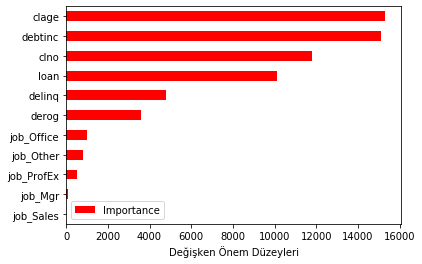

In [229]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# CatBoost (Category Boosting)

In [230]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [231]:
#!pip install catboost
from catboost import CatBoostClassifier


In [232]:
cat_model = CatBoostClassifier().fit(X_train, y_train)


Learning rate set to 0.012639
0:	learn: 0.6770390	total: 57.8ms	remaining: 57.8s
1:	learn: 0.6620332	total: 61.4ms	remaining: 30.6s
2:	learn: 0.6486283	total: 64.6ms	remaining: 21.5s
3:	learn: 0.6353573	total: 67.7ms	remaining: 16.9s
4:	learn: 0.6224700	total: 71.2ms	remaining: 14.2s
5:	learn: 0.6093922	total: 76.5ms	remaining: 12.7s
6:	learn: 0.5960442	total: 85.1ms	remaining: 12.1s
7:	learn: 0.5862344	total: 98.2ms	remaining: 12.2s
8:	learn: 0.5751007	total: 102ms	remaining: 11.2s
9:	learn: 0.5640252	total: 121ms	remaining: 12s
10:	learn: 0.5532308	total: 140ms	remaining: 12.6s
11:	learn: 0.5433383	total: 151ms	remaining: 12.4s
12:	learn: 0.5322255	total: 156ms	remaining: 11.8s
13:	learn: 0.5224868	total: 159ms	remaining: 11.2s
14:	learn: 0.5114299	total: 162ms	remaining: 10.6s
15:	learn: 0.5025611	total: 164ms	remaining: 10.1s
16:	learn: 0.4933795	total: 167ms	remaining: 9.65s
17:	learn: 0.4839450	total: 171ms	remaining: 9.31s
18:	learn: 0.4753623	total: 175ms	remaining: 9.01s
19:	l

200:	learn: 0.1800439	total: 746ms	remaining: 2.96s
201:	learn: 0.1798861	total: 749ms	remaining: 2.96s
202:	learn: 0.1797147	total: 752ms	remaining: 2.95s
203:	learn: 0.1795180	total: 755ms	remaining: 2.95s
204:	learn: 0.1793838	total: 757ms	remaining: 2.94s
205:	learn: 0.1791390	total: 760ms	remaining: 2.93s
206:	learn: 0.1789322	total: 764ms	remaining: 2.92s
207:	learn: 0.1786297	total: 767ms	remaining: 2.92s
208:	learn: 0.1782923	total: 770ms	remaining: 2.92s
209:	learn: 0.1781464	total: 774ms	remaining: 2.91s
210:	learn: 0.1780328	total: 777ms	remaining: 2.91s
211:	learn: 0.1776955	total: 780ms	remaining: 2.9s
212:	learn: 0.1775007	total: 782ms	remaining: 2.89s
213:	learn: 0.1773836	total: 784ms	remaining: 2.88s
214:	learn: 0.1771574	total: 786ms	remaining: 2.87s
215:	learn: 0.1768125	total: 790ms	remaining: 2.87s
216:	learn: 0.1766493	total: 792ms	remaining: 2.86s
217:	learn: 0.1762997	total: 794ms	remaining: 2.85s
218:	learn: 0.1760468	total: 797ms	remaining: 2.84s
219:	learn: 0

375:	learn: 0.1464931	total: 1.29s	remaining: 2.15s
376:	learn: 0.1464057	total: 1.3s	remaining: 2.15s
377:	learn: 0.1463277	total: 1.3s	remaining: 2.14s
378:	learn: 0.1461230	total: 1.3s	remaining: 2.14s
379:	learn: 0.1459304	total: 1.31s	remaining: 2.13s
380:	learn: 0.1458126	total: 1.31s	remaining: 2.13s
381:	learn: 0.1456953	total: 1.32s	remaining: 2.13s
382:	learn: 0.1455064	total: 1.32s	remaining: 2.13s
383:	learn: 0.1453482	total: 1.33s	remaining: 2.13s
384:	learn: 0.1452805	total: 1.33s	remaining: 2.12s
385:	learn: 0.1451620	total: 1.33s	remaining: 2.12s
386:	learn: 0.1449645	total: 1.33s	remaining: 2.12s
387:	learn: 0.1447283	total: 1.34s	remaining: 2.11s
388:	learn: 0.1446167	total: 1.34s	remaining: 2.1s
389:	learn: 0.1445319	total: 1.34s	remaining: 2.1s
390:	learn: 0.1443302	total: 1.34s	remaining: 2.09s
391:	learn: 0.1442939	total: 1.35s	remaining: 2.09s
392:	learn: 0.1441588	total: 1.35s	remaining: 2.08s
393:	learn: 0.1440283	total: 1.35s	remaining: 2.08s
394:	learn: 0.143

587:	learn: 0.1196501	total: 1.84s	remaining: 1.29s
588:	learn: 0.1195328	total: 1.84s	remaining: 1.28s
589:	learn: 0.1194456	total: 1.84s	remaining: 1.28s
590:	learn: 0.1193936	total: 1.85s	remaining: 1.28s
591:	learn: 0.1192751	total: 1.85s	remaining: 1.28s
592:	learn: 0.1191850	total: 1.85s	remaining: 1.27s
593:	learn: 0.1188979	total: 1.86s	remaining: 1.27s
594:	learn: 0.1188638	total: 1.86s	remaining: 1.27s
595:	learn: 0.1187855	total: 1.86s	remaining: 1.26s
596:	learn: 0.1187531	total: 1.87s	remaining: 1.26s
597:	learn: 0.1185992	total: 1.87s	remaining: 1.26s
598:	learn: 0.1185591	total: 1.87s	remaining: 1.25s
599:	learn: 0.1184260	total: 1.88s	remaining: 1.25s
600:	learn: 0.1183947	total: 1.88s	remaining: 1.25s
601:	learn: 0.1183616	total: 1.88s	remaining: 1.24s
602:	learn: 0.1182415	total: 1.88s	remaining: 1.24s
603:	learn: 0.1181836	total: 1.89s	remaining: 1.24s
604:	learn: 0.1180393	total: 1.89s	remaining: 1.23s
605:	learn: 0.1179861	total: 1.89s	remaining: 1.23s
606:	learn: 

805:	learn: 0.0980349	total: 2.38s	remaining: 573ms
806:	learn: 0.0978459	total: 2.39s	remaining: 571ms
807:	learn: 0.0978064	total: 2.39s	remaining: 569ms
808:	learn: 0.0977370	total: 2.4s	remaining: 566ms
809:	learn: 0.0976112	total: 2.4s	remaining: 563ms
810:	learn: 0.0975793	total: 2.4s	remaining: 560ms
811:	learn: 0.0975048	total: 2.41s	remaining: 557ms
812:	learn: 0.0974423	total: 2.41s	remaining: 554ms
813:	learn: 0.0973922	total: 2.41s	remaining: 552ms
814:	learn: 0.0973286	total: 2.42s	remaining: 549ms
815:	learn: 0.0973152	total: 2.42s	remaining: 546ms
816:	learn: 0.0971283	total: 2.42s	remaining: 543ms
817:	learn: 0.0970404	total: 2.43s	remaining: 540ms
818:	learn: 0.0969927	total: 2.43s	remaining: 538ms
819:	learn: 0.0968640	total: 2.43s	remaining: 534ms
820:	learn: 0.0968016	total: 2.44s	remaining: 531ms
821:	learn: 0.0966370	total: 2.44s	remaining: 528ms
822:	learn: 0.0965030	total: 2.44s	remaining: 525ms
823:	learn: 0.0964642	total: 2.45s	remaining: 523ms
824:	learn: 0.0

963:	learn: 0.0849287	total: 2.92s	remaining: 109ms
964:	learn: 0.0848713	total: 2.92s	remaining: 106ms
965:	learn: 0.0848297	total: 2.93s	remaining: 103ms
966:	learn: 0.0847216	total: 2.94s	remaining: 100ms
967:	learn: 0.0846284	total: 2.95s	remaining: 97.6ms
968:	learn: 0.0845099	total: 2.96s	remaining: 94.6ms
969:	learn: 0.0844837	total: 2.96s	remaining: 91.6ms
970:	learn: 0.0844377	total: 2.96s	remaining: 88.5ms
971:	learn: 0.0843842	total: 2.97s	remaining: 85.5ms
972:	learn: 0.0843138	total: 2.97s	remaining: 82.4ms
973:	learn: 0.0842512	total: 2.97s	remaining: 79.4ms
974:	learn: 0.0842045	total: 2.98s	remaining: 76.3ms
975:	learn: 0.0840722	total: 2.98s	remaining: 73.3ms
976:	learn: 0.0840528	total: 2.98s	remaining: 70.3ms
977:	learn: 0.0839335	total: 2.99s	remaining: 67.2ms
978:	learn: 0.0838872	total: 2.99s	remaining: 64.2ms
979:	learn: 0.0838256	total: 3s	remaining: 61.1ms
980:	learn: 0.0837826	total: 3s	remaining: 58.1ms
981:	learn: 0.0836858	total: 3s	remaining: 55ms
982:	lea

In [233]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9455445544554455

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.93      0.40      0.56        35

    accuracy                           0.95       404
   macro avg       0.94      0.70      0.77       404
weighted avg       0.94      0.95      0.94       404



## CatBoost - Model Tuning

In [179]:
?cat_model

In [180]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [181]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_
# süreden tasarruf için 5 katlı cros-val yaptık

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


0:	learn: 0.6430771	total: 1.57ms	remaining: 313ms
1:	learn: 0.5999331	total: 3.23ms	remaining: 320ms
2:	learn: 0.5602754	total: 4.71ms	remaining: 309ms
3:	learn: 0.5202965	total: 6.22ms	remaining: 305ms
4:	learn: 0.4841062	total: 7.71ms	remaining: 301ms
5:	learn: 0.4549359	total: 9.33ms	remaining: 302ms
6:	learn: 0.4284667	total: 10.8ms	remaining: 298ms
7:	learn: 0.4068946	total: 12.3ms	remaining: 295ms
8:	learn: 0.3858661	total: 13.8ms	remaining: 293ms
9:	learn: 0.3684492	total: 15.3ms	remaining: 291ms
10:	learn: 0.3516451	total: 16.8ms	remaining: 289ms
11:	learn: 0.3391897	total: 18.3ms	remaining: 287ms
12:	learn: 0.3260796	total: 19.8ms	remaining: 285ms
13:	learn: 0.3146368	total: 21.3ms	remaining: 283ms
14:	learn: 0.3034741	total: 23.1ms	remaining: 285ms
15:	learn: 0.2945966	total: 25.1ms	remaining: 288ms
16:	learn: 0.2866798	total: 27ms	remaining: 290ms
17:	learn: 0.2798869	total: 28.5ms	remaining: 288ms
18:	learn: 0.2738274	total: 30ms	remaining: 285ms
19:	learn: 0.2677436	total

192:	learn: 0.1605369	total: 365ms	remaining: 13.3ms
193:	learn: 0.1603137	total: 367ms	remaining: 11.4ms
194:	learn: 0.1597509	total: 371ms	remaining: 9.51ms
195:	learn: 0.1593916	total: 373ms	remaining: 7.61ms
196:	learn: 0.1592647	total: 375ms	remaining: 5.71ms
197:	learn: 0.1592430	total: 377ms	remaining: 3.81ms
198:	learn: 0.1589648	total: 379ms	remaining: 1.9ms
199:	learn: 0.1586484	total: 381ms	remaining: 0us


{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [183]:
catb_cv_model.best_params_


{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [235]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 3)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6430771	total: 2.13ms	remaining: 423ms
1:	learn: 0.5999331	total: 5.45ms	remaining: 539ms
2:	learn: 0.5602754	total: 7.44ms	remaining: 488ms
3:	learn: 0.5202965	total: 9.55ms	remaining: 468ms
4:	learn: 0.4841062	total: 11.6ms	remaining: 451ms
5:	learn: 0.4549359	total: 13.7ms	remaining: 444ms
6:	learn: 0.4284667	total: 15.7ms	remaining: 433ms
7:	learn: 0.4068946	total: 17.7ms	remaining: 426ms
8:	learn: 0.3858661	total: 19.7ms	remaining: 419ms
9:	learn: 0.3684492	total: 21.7ms	remaining: 413ms
10:	learn: 0.3516451	total: 23.7ms	remaining: 408ms
11:	learn: 0.3391897	total: 25.7ms	remaining: 402ms
12:	learn: 0.3260796	total: 28.4ms	remaining: 408ms
13:	learn: 0.3146368	total: 30.4ms	remaining: 404ms
14:	learn: 0.3034741	total: 32.4ms	remaining: 399ms
15:	learn: 0.2945966	total: 34.4ms	remaining: 395ms
16:	learn: 0.2866798	total: 36.3ms	remaining: 391ms
17:	learn: 0.2798869	total: 38.2ms	remaining: 387ms
18:	learn: 0.2738274	total: 40.2ms	remaining: 383ms
19:	learn: 0.2677436	t

192:	learn: 0.1605369	total: 549ms	remaining: 19.9ms
193:	learn: 0.1603137	total: 551ms	remaining: 17ms
194:	learn: 0.1597509	total: 553ms	remaining: 14.2ms
195:	learn: 0.1593916	total: 556ms	remaining: 11.4ms
196:	learn: 0.1592647	total: 559ms	remaining: 8.52ms
197:	learn: 0.1592430	total: 562ms	remaining: 5.68ms
198:	learn: 0.1589648	total: 565ms	remaining: 2.84ms
199:	learn: 0.1586484	total: 567ms	remaining: 0us


In [236]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.92      0.34      0.50        35

    accuracy                           0.94       404
   macro avg       0.93      0.67      0.73       404
weighted avg       0.94      0.94      0.93       404



Text(0.5, 0, 'Değişken Önem Düzeyleri')

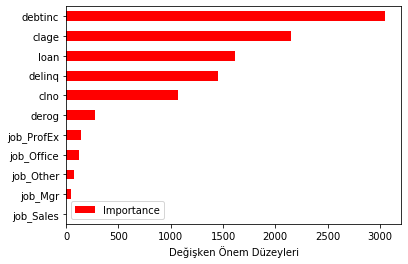

In [238]:
Importance = pd.DataFrame({"Importance": catb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Tüm Modellerin Karşılaştırılması

In [267]:
modeller = [
    gnb_model,
    bnb_model,
    mnb_model,
    knn_tuned,
    svc_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned,
    
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))


----------------------------
GaussianNB:
Accuracy: 91.5842%
----------------------------
BernoulliNB:
Accuracy: 90.5941%
----------------------------
MultinomialNB:
Accuracy: 71.2871%
----------------------------
KNeighborsClassifier:
Accuracy: 91.3366%
----------------------------
SVC:
Accuracy: 92.5743%
----------------------------
MLPClassifier:
Accuracy: 91.3366%
----------------------------
DecisionTreeClassifier:
Accuracy: 94.0594%
----------------------------
RandomForestClassifier:
Accuracy: 93.8119%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.8020%
----------------------------
CatBoostClassifier:
Accuracy: 94.0594%
----------------------------
LGBMClassifier:
Accuracy: 93.5644%
----------------------------
XGBClassifier:
Accuracy: 93.3168%


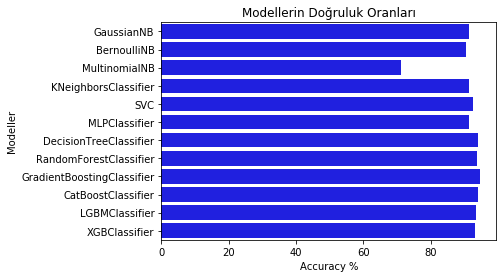

In [268]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    